In [1]:
import sys
sys.path.append('/Users/daniellebenbashat/TLProjects/projects_hub/SemanticSeg-Cityscapes')


In [3]:
from typing import Union, List
from enum import Enum
import pandas as pd
from cs_sem_seg.utils.kili_utils import _connect_to_kili
from cs_sem_seg.configs import KILI_PROJECT_ID

In [6]:
# TL clustering algorithm types
class TLClusterAlg(Enum):
    Kmeans = "kmeans"
    Bisecting = "bisecting"
    EstimatedBisecting = "estimated_bisecting"

In [ ]:



class SampleSelector:
    def __init__(self, fpath):
        # Read TL insights file
        self.df = pd.read_csv(fpath, delimiter="\t")

    def _fetch_unlabeled_cluster(self, alg: TLClusterAlg, label: int, dis_thresh: Union[float, None] = None) -> pd.DataFrame:
        df = self.df.copy()
        df = df[df[f"clusters_{alg.value}"] == label]
        df = df[df.dataset_state == "unlabeled"]
        if dis_thresh is None:
            return df
        return df[df[f"distance_clusters_{alg.value}"] < dis_thresh]

    def _assign_kili_label(self, external_ids: List[str]):
        kili = _connect_to_kili()
        assets = kili.assets(project_id=KILI_PROJECT_ID, external_id_strictly_in=list(external_ids))
        for sample in assets:
            sample['status'] = 'TODO'       # convert the labels status to review again #TODO how to use the API?

    def run_labeling_assignment(self, alg: TLClusterAlg, label: int, dis_thresh: Union[float, None] = None):
        df = self._fetch_unlabeled_cluster(alg, label, dis_thresh)
        external_ids = df["metadata.json_data_kili_external_id"].values
        self._assign_kili_label(external_ids)




if __name__ == "__main__":
fpath = "/Users/daniellebenbashat/TL/data/kili/tl_analysis_kili.csv"
# read TL insights file
    SampleSelector(fpath).run_labeling_assignment(TLClusterAlg.Kmeans, 4)



In [43]:
fpath = "tl_analysis_kili.csv"
# read TL exported .csv with the insights results
df = pd.read_csv(fpath, delimiter="\t")

# filter by the chosen cluster
alg = TLClusterAlg.Kmeans
label = 4
dis_thresh = 5
sample = df[df[f"clusters_{alg.value}"] == label]

# take the unlabeled samples
sample = sample[sample.dataset_state == "unlabeled"]

<Axes: ylabel='Frequency'>

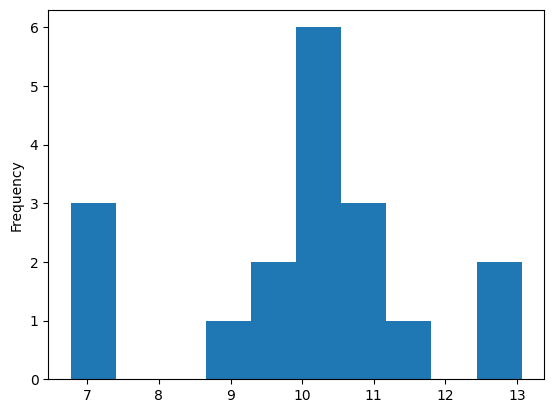

In [44]:
sample[f"distance_clusters_{alg.value}"].plot(kind="hist")

In [45]:
# choose the 50% most similar samples to cluster representation 
dis_thresh = sample[f"distance_clusters_{alg.value}"].quantile(q=0.5)
sample = sample[sample[f"distance_clusters_{alg.value}"] < dis_thresh]

In [48]:
# get the selected samples kili identifiers
external_ids = sample["metadata.json_data_kili_external_id"].values

In [51]:
import os
os.environ['AUTH_SECRET']="48df5983-7d6f-4601-ab65-83e6c435796b"

In [52]:
# connect to kili
kili = _connect_to_kili()

# get the selected samples
assets = kili.assets(project_id=KILI_PROJECT_ID, external_id_strictly_in=list(external_ids))

 # convert the labels status to review manualy
for sample in assets:
    sample['status'] = 'TODO'   

'TODO'